In [283]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

X,y= make_classification(n_samples = 10000, n_features= 7, n_informative = 5, class_sep=2, random_state=42)
df = pd.DataFrame(np.c_[X,y], columns = ["a","b","c","d","e","f","g","h"])
df

,a,b,c,d,e,f,g,h
0,1.313229,-1.733221,-3.173626,-2.801743,-6.603950,3.441705,3.623578,0.0
1,2.851976,0.897278,-1.871234,3.023142,-0.209348,1.835815,-1.065970,1.0
2,3.015393,-0.043049,-2.139543,1.465564,-1.347321,2.730734,-0.744546,1.0
3,2.173521,-3.957855,-2.004541,-1.975495,-4.823000,1.686383,0.852389,0.0
4,0.659610,-0.542015,-1.439076,-1.058947,-4.408474,2.302715,2.974768,0.0
...,...,...,...,...,...,...,...,...
9995,0.579764,-1.609468,-1.181345,-0.271099,-3.192754,0.038127,1.617948,0.0
9996,-0.507570,-2.018732,-1.778298,-2.257395,-2.568908,-0.986340,1.261355,0.0
9997,2.591990,-1.284532,-4.725089,-0.494016,-7.060236,3.237372,3.487658,0.0
9998,6.243047,-5.315111,-6.495654,-0.201934,-2.028574,1.414206,-4.991044,1.0


In [284]:
df.duplicated().sum()

0

In [285]:
df.isna().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
dtype: int64

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       10000 non-null  float64
 1   b       10000 non-null  float64
 2   c       10000 non-null  float64
 3   d       10000 non-null  float64
 4   e       10000 non-null  float64
 5   f       10000 non-null  float64
 6   g       10000 non-null  float64
 7   h       10000 non-null  float64
dtypes: float64(8)
memory usage: 625.1 KB


In [287]:
df.describe()

,a,b,c,d,e,f,g,h
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.071892,-0.001747,-1.004918,0.995967,-1.869138,0.994744,0.982548,0.499200
std,2.571314,2.446634,2.125161,2.161592,2.587044,2.266276,2.236374,0.500024
min,-6.507147,-8.263252,-7.361942,-6.124101,-10.552410,-6.274545,-6.334871,0.000000
25%,-1.196634,-1.984409,-2.575438,-0.507065,-3.750591,-0.594088,-0.418504,0.000000
50%,1.182811,0.215688,-1.448219,1.478394,-1.769049,1.373192,1.414705,0.000000
75%,3.296581,1.985890,0.666344,2.529939,0.072616,2.617999,2.548942,1.000000
max,8.484377,6.944183,6.445003,7.824402,5.853682,7.815690,7.784181,1.000000


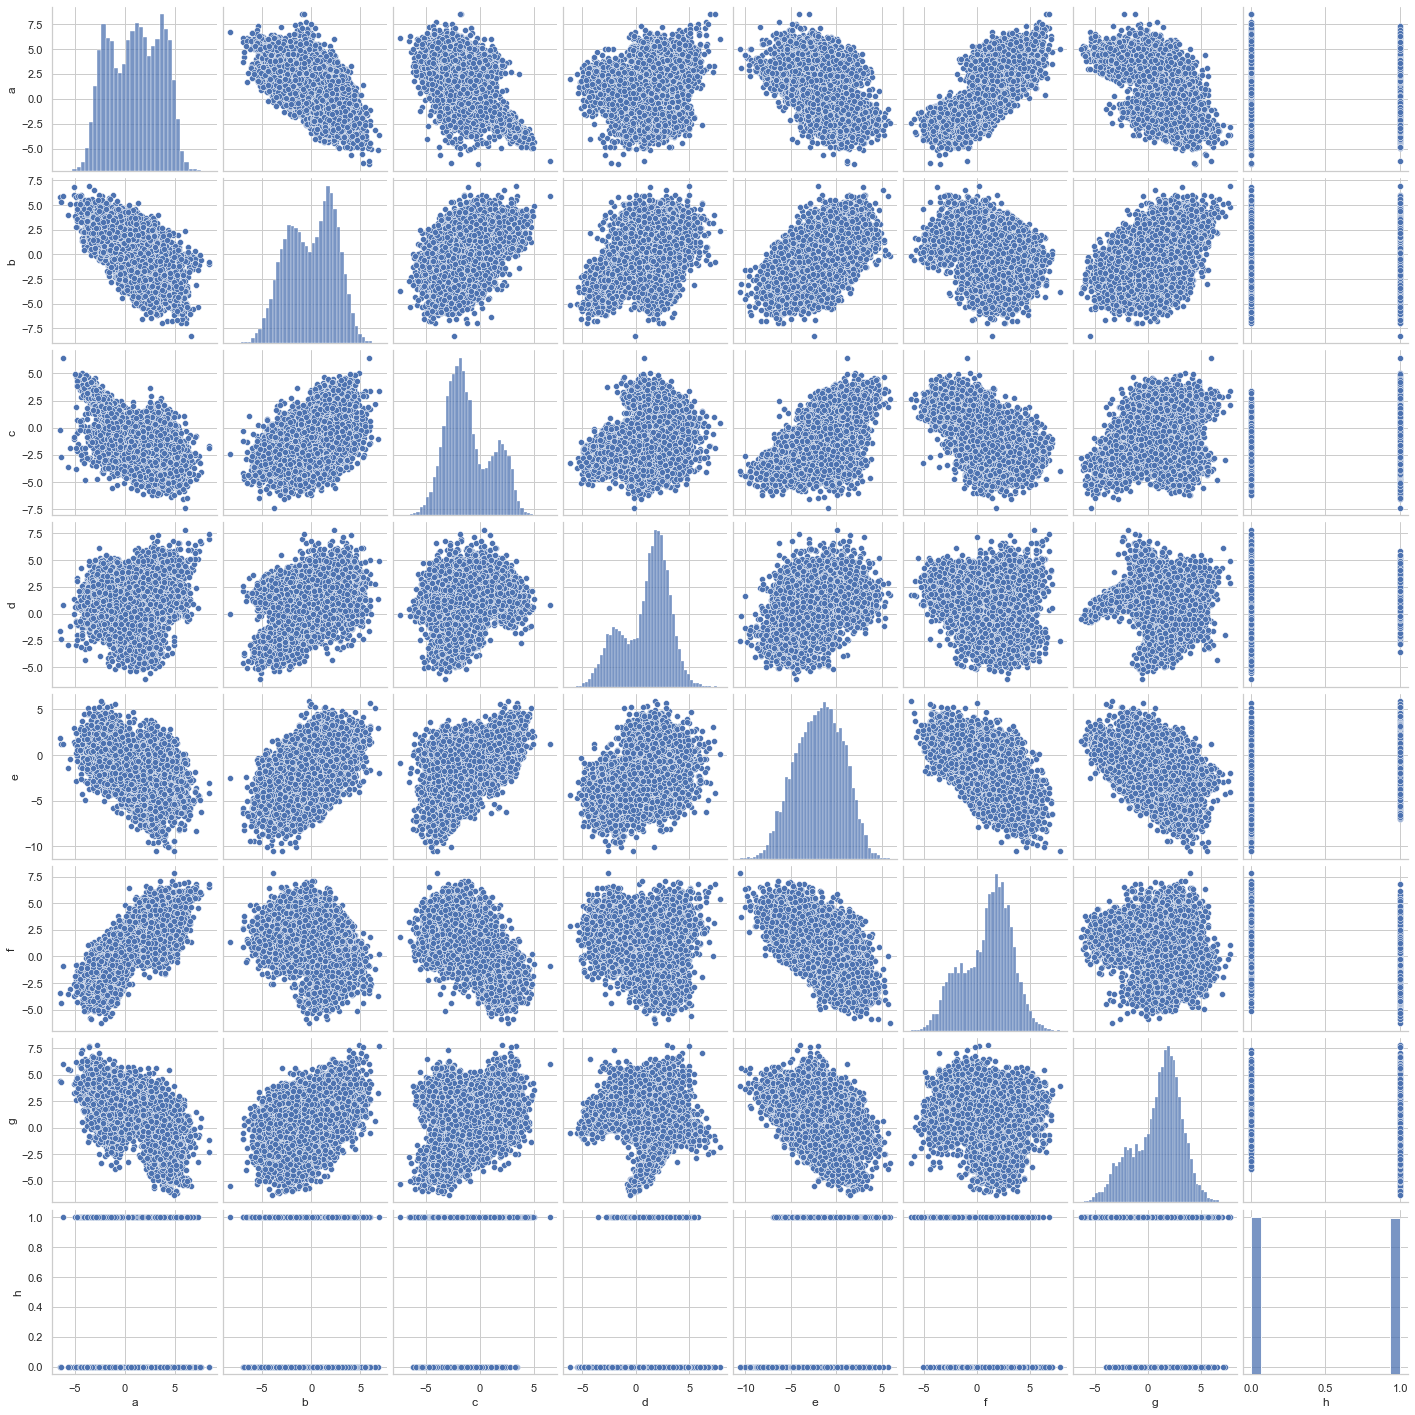

In [288]:
import seaborn as sns
sns.pairplot(df)

In [289]:
corr_value = df.corr()

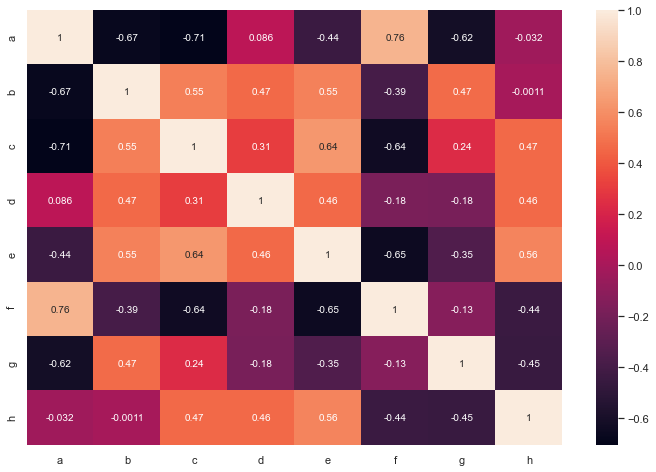

In [290]:
corr_value = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_value, annot=True)
plt.show()

In [291]:
#Outlier Detection- IQR
sorted_df = np.sort(df)
sorted_df

array([[-6.60395002, -3.17362646, -2.8017429 , ...,  1.31322946,
         3.44170546,  3.62357804],
       [-1.87123449, -1.06596963, -0.20934831, ...,  1.83581511,
         2.85197562,  3.02314207],
       [-2.13954275, -1.34732068, -0.74454634, ...,  1.46556429,
         2.73073363,  3.01539262],
       ...,
       [-7.06023611, -4.72508881, -1.28453188, ...,  2.59199006,
         3.23737233,  3.48765767],
       [-6.49565438, -5.31511138, -4.9910438 , ...,  1.        ,
         1.41420645,  6.2430467 ],
       [-0.6648976 , -0.43408716, -0.06231119, ...,  1.27625123,
         2.33839933,  3.19352779]])

In [293]:
Q1= np.percentile(df,25, interpolation ='midpoint')
Q2 = np.percentile(df,50,interpolation ='midpoint')
Q3 = np.percentile(df,75,interpolation ='midpoint')
IQR= Q3-Q1
print("Q1:", Q1)
print("Q2:",Q2)
print("Q3:",Q3)
print("....................")
print("IQR:",IQR)

Q1: -1.5855551048923362
Q2: 0.464890249398982
Q3: 1.949529072095606
....................
IQR: 3.535084176987942


In [294]:
low_limit= Q1 - 1.5*IQR
upper_limit= Q3 + 1.5*IQR
print("Low :",low_limit)
print("Upper:",upper_limit)

Low : -6.888181370374249
Upper: 7.252155337577519


In [295]:
Q1 = df.quantile(0.25)
Q3= df.quantile(0.75)
IQR = Q3- Q1
print(IQR)



a    4.493215
b    3.970298
c    3.241782
d    3.037003
e    3.823207
f    3.212087
g    2.967446
h    1.000000
dtype: float64


In [296]:
df.shape

(10000, 8)

In [297]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(9910, 8)


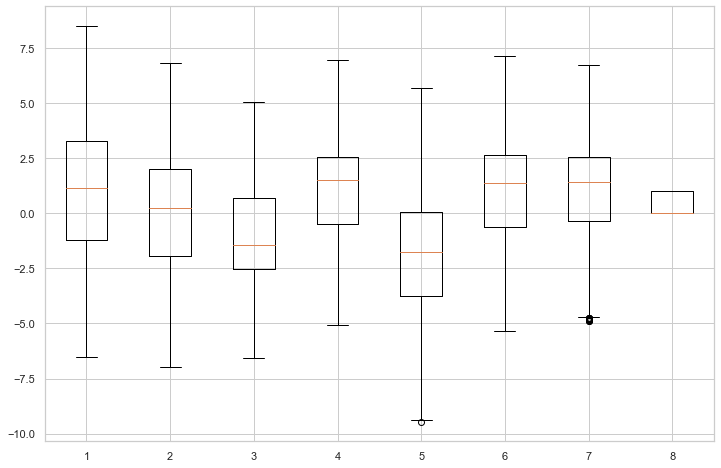

In [298]:

plt.figure(figsize=(12, 8))
plt.boxplot(df_out)
plt.show()

In [299]:
#Splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X_train.shape

(7000, 7)

In [300]:
from sklearn.tree import DecisionTreeClassifier

dtc= DecisionTreeClassifier(max_depth=4, random_state=42)
dtc.fit(X_train,y_train)

print("Accuracy train : ",dtc.score(X_train,y_train))
print("Accuracy test:",dtc.score(X_test,y_test))

Accuracy train :  0.9627142857142857
Accuracy test: 0.9623333333333334


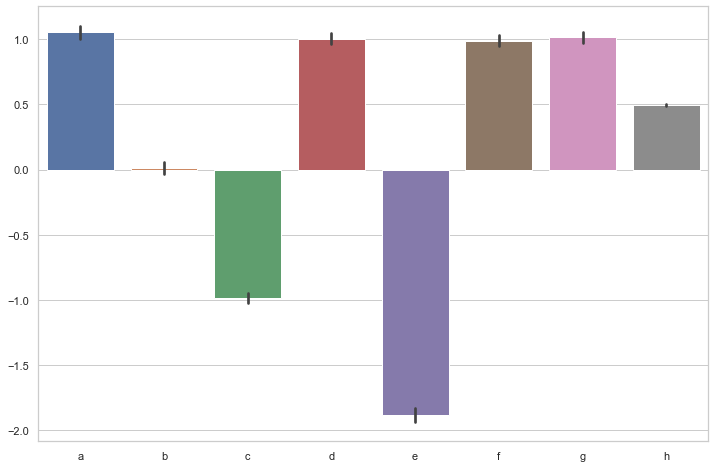

In [301]:
plt.figure(figsize=(12, 8))
importance = dtc.feature_importances_
sns.barplot(data=df_out)
plt.show()

In [302]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,classification_report,f1_score
prediction = dtc.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1484
           1       0.97      0.95      0.96      1516

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



In [303]:
print("Precision = {}".format(precision_score(y_test, prediction, average='macro')))
print("Recall = {}".format(recall_score(y_test, prediction, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, prediction)))
print("F1 Score = {}".format(f1_score(y_test, prediction,average='macro')))

Precision = 0.9624329099576624
Recall = 0.9624392819805276
Accuracy = 0.9623333333333334
F1 Score = 0.9623333291481475


In [304]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)
print(cm)

[[1443   41]
 [  72 1444]]


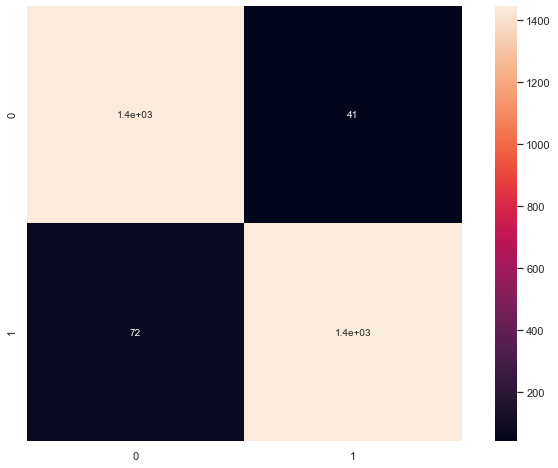

In [305]:

plt.figure(figsize=(12, 8))
sns.heatmap(cm,square=True, annot=True, cbar=True)
plt.show()

In [306]:
!pip install xgboost


In [308]:
#XBoost

boost_train = xgb.DMatrix(data=X_train,label=y_train)
boost_test= xgb.DMatrix(data=X_test, label=y_test)

In [309]:
param= {'max_depth': 4,
       'eta':1,
       'objective':'multi:softprob',
       'num_class':3}
num_round=5
x_model= xgb.train(param,boost_train,num_round)

[01:57:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [310]:
predictions = x_model.predict(boost_test)
predictions[:15]

array([[0.99371296, 0.00415558, 0.00213146],
       [0.00224044, 0.9959196 , 0.00183992],
       [0.99491185, 0.0031532 , 0.00193498],
       [0.01329342, 0.9830993 , 0.00360729],
       [0.00388126, 0.99371135, 0.00240739],
       [0.00910299, 0.98660755, 0.00428942],
       [0.00795143, 0.9883018 , 0.00374679],
       [0.01023324, 0.98713106, 0.00263567],
       [0.9890237 , 0.00864066, 0.0023357 ],
       [0.9296993 , 0.0604157 , 0.009885  ],
       [0.00910299, 0.98660755, 0.00428942],
       [0.01263393, 0.9842286 , 0.00313744],
       [0.99014294, 0.00651526, 0.00334177],
       [0.01805804, 0.9770314 , 0.00491051],
       [0.9929598 , 0.00492023, 0.00211992]], dtype=float32)

In [311]:
best_predict = np.asarray([np.argmax(line) for line in predictions])

In [312]:
best_predict

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [313]:
print("Precision = {}".format(precision_score(y_test, best_predict, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_predict, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_predict)))

Precision = 0.9863190353923263
Recall = 0.9863637818347333
Accuracy = 0.9863333333333333


In [314]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, best_predict)
print(cm)

[[1468   16]
 [  25 1491]]


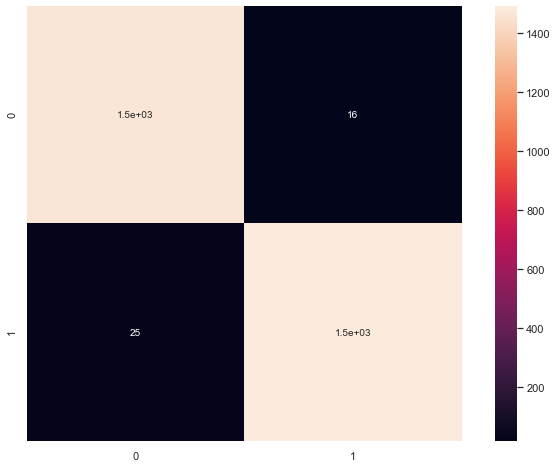

In [315]:

plt.figure(figsize=(12, 8))
sns.heatmap(cm,square=True, annot=True, cbar=True)
plt.show()

In [316]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [317]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [318]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[01:57:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [319]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.314483


In [320]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=boost_train, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[01:57:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:57:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:57:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [321]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.474832,0.000388,0.475339,0.000048
1,0.452933,0.005302,0.454100,0.005135
2,0.425305,0.005132,0.426875,0.004666
3,0.406512,0.003582,0.408145,0.003095
4,0.392169,0.002555,0.394349,0.002124


In [322]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.182918
Name: test-rmse-mean, dtype: float64


In [323]:
xg_reg = xgb.train(params=params, dtrain=boost_train, num_boost_round=10)

[01:57:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


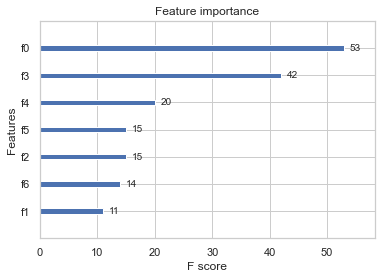

In [324]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [8, 10]
plt.show()

In [325]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[1443   41]
 [  72 1444]]


In [326]:
print("Precision = {}".format(precision_score(y_test, best_predict, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_predict, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_predict)))

Precision = 0.9863190353923263
Recall = 0.9863637818347333
Accuracy = 0.9863333333333333


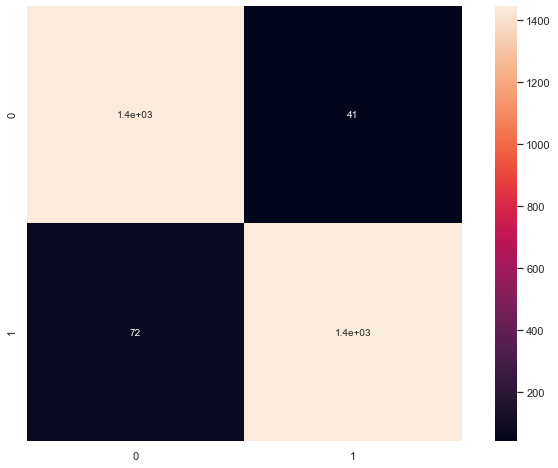

In [327]:
plt.figure(figsize=(12, 8))
sns.heatmap(cm,square=True, annot=True, cbar=True)
plt.show()

# Sonuç

Xgboost uygulanmış algoritmanın diğer algoritmalara göre daha az hata verdiğini oluşturduğum confision matrixlere bakarak görebiliriz. Xgboost accuracy score'u 0.9863 olarak görülmektedir.